In [166]:
import pandas
import numpy
from sqlalchemy import create_engine

# Tables

In [167]:
arima_data = pandas.read_csv('arima_data.csv')

In [168]:
arima_data

,Unnamed: 0,ticker,company_id,filing_date,time,start_quarter_date,end_quarter_date,group,actual_sales,datetime,estimation
0,0,TRIP US,464,2011-09-22,0 days 00:00:00.000000000,2011-01-01,2011-03-31,11q1,149222000.0,2001-01-01,0.0
1,1,TRIP US,464,2011-09-22,0 days 00:00:00.000000000,2011-01-01,2011-03-31,11q2,149222000.0,2012-04-04,0.0
2,2,TRIP US,464,2012-01-13,0 days 00:00:00.000000000,2011-07-01,2011-09-30,11q3,180801000.0,2012-04-18,181000000.0
3,3,TRIP US,464,2012-02-08,0 days 17:03:00.000000000,2011-10-01,2011-12-31,11q4,137798000.0,2012-02-07,135091000.0
4,4,TRIP US,464,2012-05-01,0 days 21:00:00.000000000,2012-01-01,2012-03-31,12q1,183715000.0,2012-05-01,174357000.0
5,5,TRIP US,464,2012-07-24,0 days 16:02:00.000000000,2012-04-01,2012-06-30,12q2,197148000.0,2012-07-24,203643000.0
6,6,TRIP US,464,2012-11-01,0 days 16:04:00.000000000,2012-07-01,2012-09-30,12q3,212710000.0,2012-10-31,211294000.0
7,7,TRIP US,464,2013-02-13,0 days 21:00:00.000000000,2012-10-01,2012-12-31,12q4,169393000.0,2013-02-13,167368000.0
8,8,TRIP US,464,2013-05-07,0 days 21:00:00.000000000,2013-01-01,2013-03-31,13q1,229919000.0,2013-05-06,224444000.0
9,9,TRIP US,464,2013-07-24,0 days 16:03:00.000000000,2013-04-01,2013-06-30,13q2,246937000.0,2013-07-24,236650000.0


In [169]:
arima_data = arima_data[['group', 'actual_sales', 'estimation']][1:]
#arima_data

In [170]:
#data

In [171]:
#data.columns

In [172]:
#data = pandas.read_sql_query("select * from altdata.everything where ticker='TRIP US ' order by grp", conn)
#data.to_csv('data.csv')
data = pandas.read_csv('data.csv')
data

,Unnamed: 0,company_id,ticker,grp,start_quarter_date,end_quarter_date,filing_date,actual_sales,sales_reported,tme,...,total_visit_duration,total_bounce_rate,total_page_views,current_installs,downloads,usage_time,average_sessions_per_user,daily_active_users,usage_penetration,open_rate
0,0,464,TRIP US,16q2,2016-04-01,2016-06-30,2016-08-03,391000000.0,391000000.0,0 days 21:00:00.000000000,...,NaN,NaN,NaN,0.016934,1496407.0,0.000927,0.707827,34275211.0,0.000373,0.029257
1,1,464,TRIP US,16q3,2016-07-01,2016-09-30,2016-11-08,421000000.0,421000000.0,0 days 17:03:00.000000000,...,181.236770,0.480604,1.098150e+10,0.016204,4947197.0,0.001012,0.653992,103729385.0,0.000391,0.025840
2,2,464,TRIP US,16q4,2016-10-01,2016-12-31,2017-02-15,316000000.0,316000000.0,0 days 17:01:00.000000000,...,190.482803,0.468925,6.861306e+09,0.015805,4110234.0,0.002327,0.624213,130950350.0,0.000498,0.022566
3,3,464,TRIP US,17q1,2017-01-01,2017-03-31,2017-05-09,372000000.0,372000000.0,0 days 16:03:00.000000000,...,202.557711,0.473985,7.793640e+09,0.014892,3045809.0,0.003173,0.694157,157742902.0,0.000629,0.025366
4,4,464,TRIP US,17q2,2017-04-01,2017-06-30,2017-08-08,424000000.0,424000000.0,0 days 16:02:00.000000000,...,196.936362,0.479855,9.514547e+09,0.013707,3246384.0,0.003491,1.207028,162051460.0,0.000589,0.034672
5,5,464,TRIP US,17q3,2017-07-01,2017-09-30,2017-11-06,439000000.0,439000000.0,0 days 16:02:00.000000000,...,179.048891,0.486104,1.190125e+10,0.012684,3729681.0,0.004692,2.738132,135807169.0,0.000411,0.063926
6,6,464,TRIP US,17q4,2017-10-01,2017-12-31,2018-02-14,321000000.0,321000000.0,0 days 16:17:00.000000000,...,176.513141,0.517536,7.538703e+09,0.010524,3456543.0,0.003767,2.579803,112755618.0,0.000308,0.043257
7,7,464,TRIP US,18q1,2018-01-01,2018-03-31,2018-05-08,378000000.0,378000000.0,0 days 16:04:00.000000000,...,191.133831,0.516911,1.028260e+10,0.008789,3305692.0,0.003251,2.361199,109465599.0,0.000283,0.041359
8,8,464,TRIP US,18q2,2018-04-01,2018-06-30,2018-08-01,433000000.0,433000000.0,0 days 16:03:00.000000000,...,186.879121,0.523338,1.179275e+10,0.008923,2747150.0,0.002811,2.284733,155054668.0,0.000415,0.040222
9,9,464,TRIP US,18q3,2018-07-01,2018-09-30,2018-11-07,458000000.0,458000000.0,0 days 16:02:00.000000000,...,172.498993,0.533172,1.511715e+10,0.008904,2638558.0,0.003866,3.419513,140025637.0,0.000384,0.055213


# Сorrelation

In [173]:
data = data[['ticker','grp','actual_sales','estimation','total_visits']].sort_values('grp')
data.corr()

,actual_sales,estimation,total_visits
actual_sales,1.000000,0.974919,0.791571
estimation,0.974919,1.000000,0.731476
total_visits,0.791571,0.731476,1.000000


In [174]:
#data.to_csv("out.csv")
data = data[1:]
data

,ticker,grp,actual_sales,estimation,total_visits
1,TRIP US,16q3,421000000.0,436560000.0,1.757910e+09
2,TRIP US,16q4,316000000.0,327000000.0,1.100433e+09
3,TRIP US,17q1,372000000.0,376217000.0,1.270161e+09
4,TRIP US,17q2,424000000.0,421000000.0,1.387965e+09
5,TRIP US,17q3,439000000.0,451696000.0,1.754454e+09
6,TRIP US,17q4,321000000.0,309739000.0,1.193995e+09
7,TRIP US,18q1,378000000.0,360783000.0,1.361003e+09
8,TRIP US,18q2,433000000.0,434958000.0,1.556437e+09
9,TRIP US,18q3,458000000.0,469417000.0,1.934005e+09
10,TRIP US,18q4,346000000.0,342833000.0,1.222449e+09


In [175]:
#data.index

In [176]:
from matplotlib import pyplot as plt
import seaborn as sns

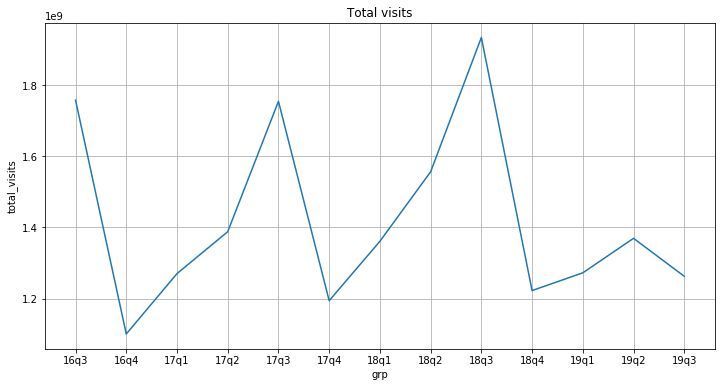

In [177]:
plt.figure(figsize=(12, 6))
plt.title('Total visits')
plt.plot(data.grp, data.total_visits)
plt.xlabel('grp')
plt.ylabel('total_visits')
plt.grid()
plt.show()

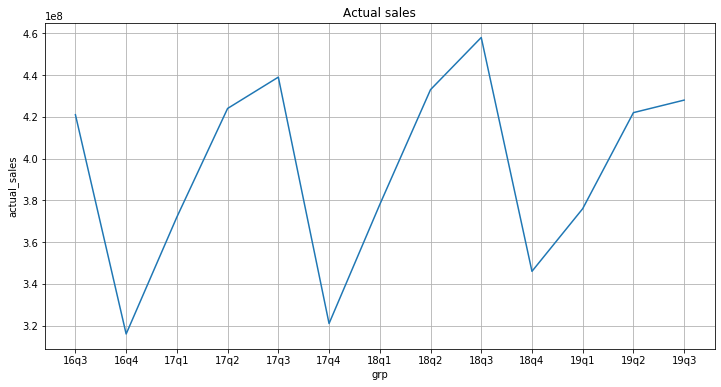

In [178]:
plt.figure(figsize=(12, 6))
plt.title('Actual sales')
plt.plot(data.grp, data.actual_sales)
plt.xlabel('grp')
plt.ylabel('actual_sales')
plt.grid()
plt.show()

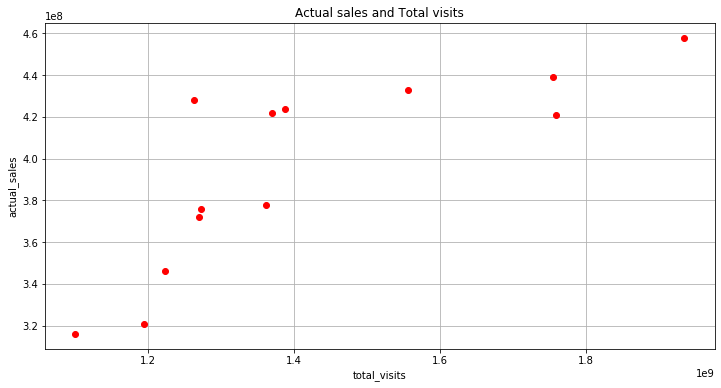

In [179]:
plt.figure(figsize=(12, 6))
plt.title('Actual sales and Total visits')
plt.plot(data.total_visits, data.actual_sales, 'ro')
plt.xlabel('total_visits')
plt.ylabel('actual_sales')
plt.grid()
plt.show()

estimation and actaul sales

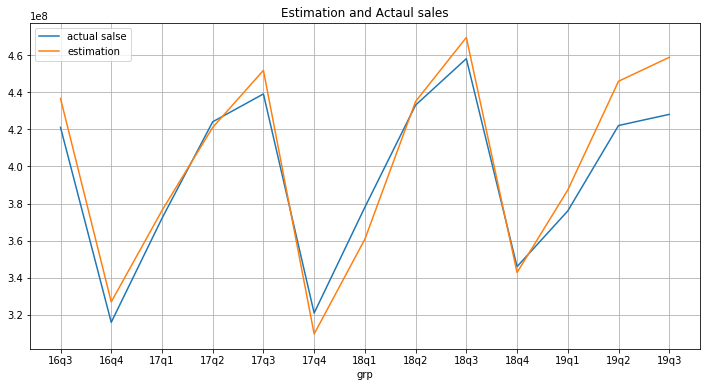

In [180]:
plt.figure(figsize=(12, 6))
plt.title('Estimation and Actaul sales')
plt.plot(data.grp, data.actual_sales,label = 'actual salse')
plt.plot(data.grp, data.estimation, label = 'estimation')
plt.xlabel('grp')
plt.legend()
plt.grid()
plt.show()

In [181]:
err = pandas.DataFrame(columns = ['grp','error'], index = data.index)
err['grp'] = data['grp']
err['error'] = 100*(data['actual_sales'] - data['estimation'])/data['actual_sales']
err

,grp,error
1,16q3,-3.695962
2,16q4,-3.481013
3,17q1,-1.133602
4,17q2,0.707547
5,17q3,-2.892027
6,17q4,3.508100
7,18q1,4.554762
8,18q2,-0.452194
9,18q3,-2.492795
10,18q4,0.915318


<Figure size 864x864 with 0 Axes>

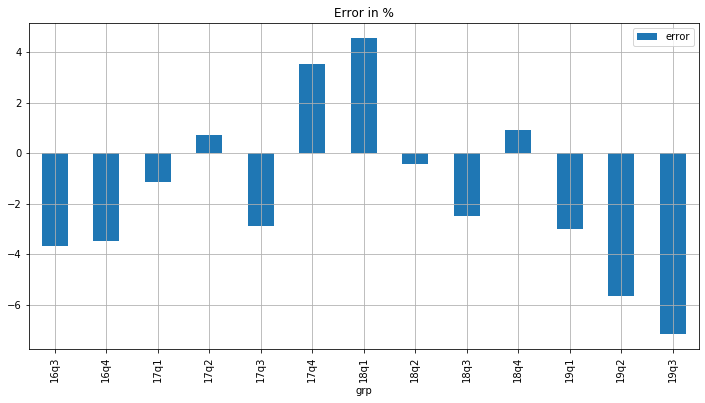

In [182]:
plt.figure(figsize=(12, 12))
err.plot(kind='bar', x='grp',y='error',figsize=(12, 6),title='Error in %').grid()

In [183]:
actual = numpy.array(data.actual_sales)
estimation = numpy.array(data.estimation)
numpy.column_stack([actual,estimation])

array([[4.21000e+08, 4.36560e+08],
       [3.16000e+08, 3.27000e+08],
       [3.72000e+08, 3.76217e+08],
       [4.24000e+08, 4.21000e+08],
       [4.39000e+08, 4.51696e+08],
       [3.21000e+08, 3.09739e+08],
       [3.78000e+08, 3.60783e+08],
       [4.33000e+08, 4.34958e+08],
       [4.58000e+08, 4.69417e+08],
       [3.46000e+08, 3.42833e+08],
       [3.76000e+08, 3.87273e+08],
       [4.22000e+08, 4.45826e+08],
       [4.28000e+08, 4.58727e+08]])

Average deviation of consensus estimates from real

In [184]:
abs(estimation-actual).mean()/(abs(actual).mean())

0.030642578885858977

# Calculate with sklearn

In [185]:
from sklearn.linear_model import LinearRegression
import numpy


In [186]:
data = data.reset_index(drop=True)
lin_model = LinearRegression()
lin_model.fit(numpy.array(data.total_visits).reshape(-1, 1), numpy.array(data.actual_sales))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [187]:
 lin_model.intercept_, lin_model.coef_

(189594467.9935392, array([0.14473022]))

In [188]:
predicted = lin_model.predict(numpy.array(data.total_visits).reshape(-1, 1))
actual = numpy.array(data.actual_sales)

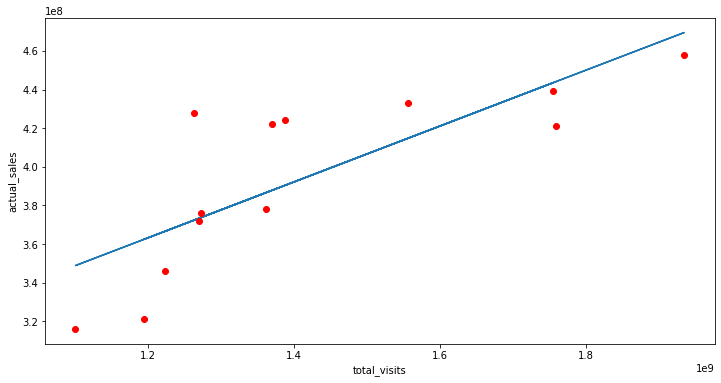

In [189]:
from matplotlib import pyplot as plt
df = data
plt.figure(figsize=(12, 6))
plt.plot(data.total_visits, predicted)
plt.plot(data.total_visits, data.actual_sales, 'ro')
plt.xlabel('total_visits')
plt.ylabel('actual_sales')
plt.show()

In [190]:
lin_predict = pandas.DataFrame(predicted)
lin_predict['predicted'] = predicted
lin_predict['grp'] = data['grp']
lin_all = lin_predict
lin = lin_predict.tail(4).reset_index()
lin

,index,0,predicted,grp
0,9,3.665198e+08,3.665198e+08,18q4
1,10,3.737430e+08,3.737430e+08,19q1
2,11,3.877800e+08,3.877800e+08,19q2
3,12,3.723269e+08,3.723269e+08,19q3


In [191]:
lin_all

,0,predicted,grp
0,4.440171e+08,4.440171e+08,16q3
1,3.488604e+08,3.488604e+08,16q4
2,3.734251e+08,3.734251e+08,17q1
3,3.904750e+08,3.904750e+08,17q2
4,4.435169e+08,4.435169e+08,17q3
5,3.624016e+08,3.624016e+08,17q4
6,3.865727e+08,3.865727e+08,18q1
7,4.148580e+08,4.148580e+08,18q2
8,4.695034e+08,4.695034e+08,18q3
9,3.665198e+08,3.665198e+08,18q4


In [192]:
err = pandas.DataFrame(columns = ['grp','error'], index = data.index)
err['grp'] = data['grp']
err['error'] = 100*(data['actual_sales'] - predicted)/data['actual_sales']
#err

<Figure size 864x864 with 0 Axes>

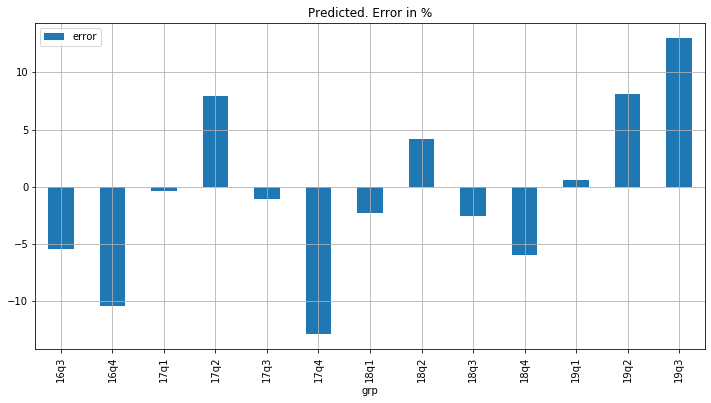

In [193]:
plt.figure(figsize=(12, 12))
err.plot(kind='bar', x='grp',y='error',figsize=(12, 6),title='Predicted. Error in %').grid()

In [194]:
numpy.column_stack([predicted, actual])

array([[4.44017139e+08, 4.21000000e+08],
       [3.48860400e+08, 3.16000000e+08],
       [3.73425145e+08, 3.72000000e+08],
       [3.90474984e+08, 4.24000000e+08],
       [4.43516944e+08, 4.39000000e+08],
       [3.62401585e+08, 3.21000000e+08],
       [3.86572685e+08, 3.78000000e+08],
       [4.14858012e+08, 4.33000000e+08],
       [4.69503409e+08, 4.58000000e+08],
       [3.66519787e+08, 3.46000000e+08],
       [3.73743002e+08, 3.76000000e+08],
       [3.87780049e+08, 4.22000000e+08],
       [3.72326858e+08, 4.28000000e+08]])

In [195]:
abs(predicted - actual).mean()/(abs(actual).mean())

0.05602535834090301

# ARIMA model

In [196]:
reported_sales = list(arima_data[['actual_sales', 'group']].sort_values('group').actual_sales)
#reported_sales

In [197]:
len(reported_sales)

35

In [198]:
from rpy2.robjects.packages import importr
from rpy2 import robjects
robjects.r("""
library('forecast')
train = c(10363000000.0,
 10594000000.0,
 9789000000.0,
 9624000000.0,
 11105000000.0,
 10878000000.0,
 10600000000.0,
 10401000000.0,
 11643000000.0,
 11559000000.0,
 10938000000.0,
 10584000000.0,
 11960000000.0)

train_ts_log = ts(log(train + 1), frequency=4)
model_log = auto.arima(train_ts_log)
arima_forecast = forecast(model_log, h =1)
exp(arima_forecast$mean) - 1

""")

12133522684.111135


In [199]:
df_for_prediction = arima_data.drop(['estimation'],axis=1)
#df_for_prediction

In [200]:
predictions = []
actual_vec = []
for i in range(30, len(reported_sales)):
    time_series = reported_sales[1:i]
    time_series_str = ','.join(map(str, time_series))
    str_to_run_in_R = """
    library('forecast')
    train = c({TIME_SERIES})
    train_ts_log = ts(log(train + 1), frequency=4)
    model_log = auto.arima(train_ts_log)
    arima_forecast = forecast(model_log, h =1)
    exp(arima_forecast$mean) - 1
    """.format(TIME_SERIES=time_series_str)
    prediction = robjects.r(str_to_run_in_R)
    predictions.append(float(numpy.array(prediction)))
    actual = reported_sales[i]
    actual_vec.append(actual)

In [201]:
pandas.DataFrame(predictions)

,0
0,3.378364e+08
1,4.130665e+08
2,4.185408e+08
3,4.432240e+08
4,3.185044e+08


In [202]:
predict_df = pandas.DataFrame(predictions)
predict_df['predictions'] = predictions
predict_df['group'] = ['18q4','19q1','19q2','19q3','19q4']
#predict_df

In [203]:
#arima_data

In [204]:
#df_predictions.predictions

In [205]:
pred_and_actual_df = pandas.merge(df_for_prediction,predict_df)
#pred_and_actual_df

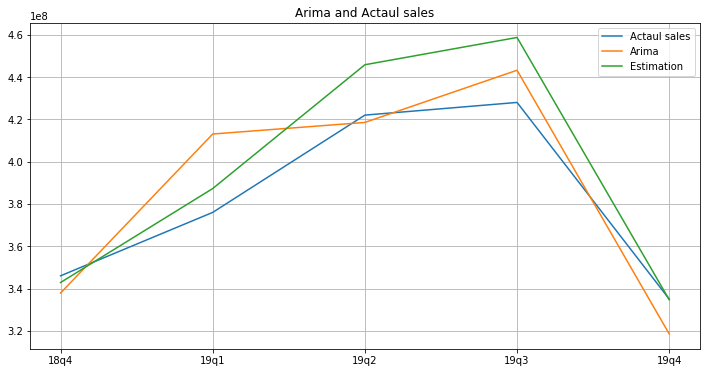

In [206]:
plt.figure(figsize=(12, 6))
plt.title('Arima and Actaul sales')
ar = arima_data.tail(5).reset_index()
plt.plot(ar.group, ar.actual_sales,label = 'Actaul sales')
plt.plot(pred_and_actual_df.group, predict_df.predictions,label = 'Arima' )
plt.plot(ar.group, ar.estimation,label = 'Estimation')
plt.legend()
plt.grid()
plt.show()

In [207]:
ar

,index,group,actual_sales,estimation
0,31,18q4,346000000.0,342833000.0
1,32,19q1,376000000.0,387273000.0
2,33,19q2,422000000.0,445826000.0
3,34,19q3,428000000.0,458727000.0
4,35,19q4,335000000.0,334696000.0


In [208]:
actual = numpy.array(ar.actual_sales)
predictions = numpy.array(pred_and_actual_df.predictions)
numpy.column_stack([pred_and_actual_df, ar.actual_sales])
abs(predictions-actual).mean()/(abs(predictions).mean())

0.041637392603620774

In [209]:
err = pandas.DataFrame(columns = ['grp','error_arr', 'err_cons'], index = pred_and_actual_df.index)
err['grp'] = pred_and_actual_df['group']
err['error_arr'] = 100*(ar.actual_sales-pred_and_actual_df.predictions)/ar.actual_sales
err['err_cons'] = 100*(ar.actual_sales-ar.estimation)/ar.actual_sales
err

,grp,error_arr,err_cons
0,18q4,2.359414,0.915318
1,19q1,-9.858121,-2.998138
2,19q2,0.819725,-5.645972
3,19q3,-3.557020,-7.179206
4,19q4,4.924055,0.090746


<Figure size 864x864 with 0 Axes>

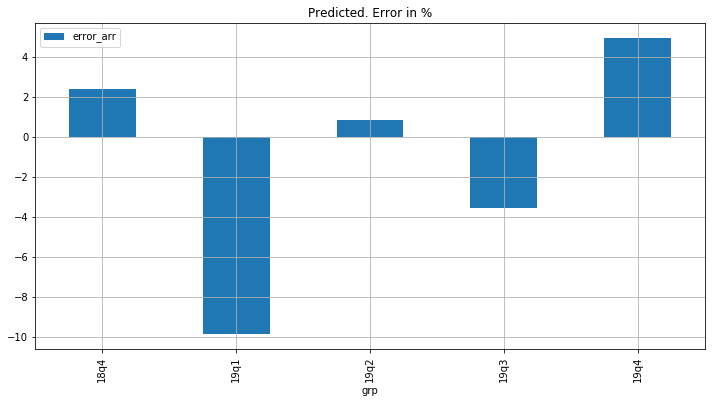

In [210]:
plt.figure(figsize=(12, 12))
err.plot(kind='bar', x='grp',y='error_arr',figsize=(12, 6),title='Predicted. Error in %').grid()

<Figure size 864x864 with 0 Axes>

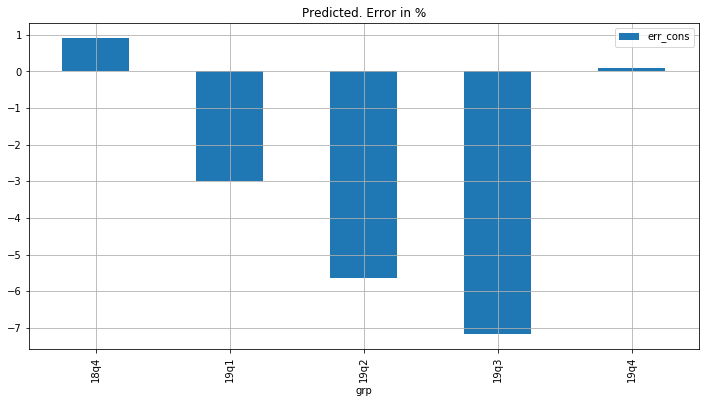

In [211]:
plt.figure(figsize=(12, 12))
err.plot(kind='bar', x='grp',y='err_cons',figsize=(12, 6),title='Predicted. Error in %').grid()

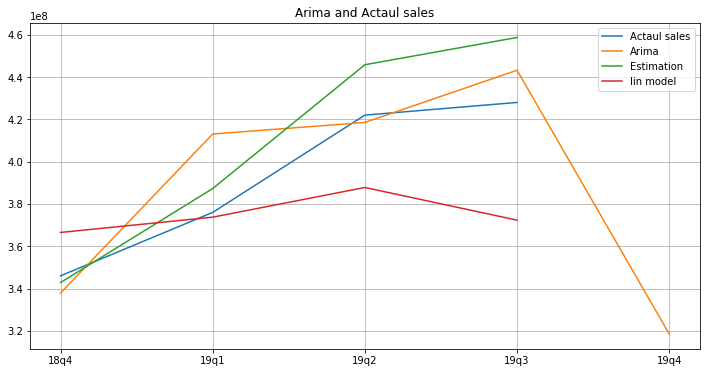

In [212]:
plt.figure(figsize=(12, 6))
plt.title('Arima and Actaul sales')
ar = arima_data.tail(5).reset_index()
ar = ar[0:4]
#predict_df = predict_df[0:3]
plt.plot(ar.group, ar.actual_sales,label = 'Actaul sales')
plt.plot(pred_and_actual_df.group, predict_df.predictions,label = 'Arima' )
plt.plot(ar.group, ar.estimation,label = 'Estimation')
plt.plot(ar.group, lin.predicted,label = 'lin model')
plt.legend()
plt.grid()
plt.show()


In [213]:
abs(lin.predicted- ar.actual_sales).mean()/(abs(ar.actual_sales).mean())

0.07167295059469952

In [214]:
abs(ar.estimation- ar.actual_sales).mean()/(abs(ar.estimation).mean())

0.04220635618804901

In [215]:
abs(predict_df.predictions - ar.actual_sales).mean()/(abs(predict_df.predictions).mean())

0.04136955790400823

In [216]:
ar

,index,group,actual_sales,estimation
0,31,18q4,346000000.0,342833000.0
1,32,19q1,376000000.0,387273000.0
2,33,19q2,422000000.0,445826000.0
3,34,19q3,428000000.0,458727000.0


In [217]:
lin

,index,0,predicted,grp
0,9,3.665198e+08,3.665198e+08,18q4
1,10,3.737430e+08,3.737430e+08,19q1
2,11,3.877800e+08,3.877800e+08,19q2
3,12,3.723269e+08,3.723269e+08,19q3


In [218]:
predict_df

,0,predictions,group
0,3.378364e+08,3.378364e+08,18q4
1,4.130665e+08,4.130665e+08,19q1
2,4.185408e+08,4.185408e+08,19q2
3,4.432240e+08,4.432240e+08,19q3
4,3.185044e+08,3.185044e+08,19q4


# Add seasons


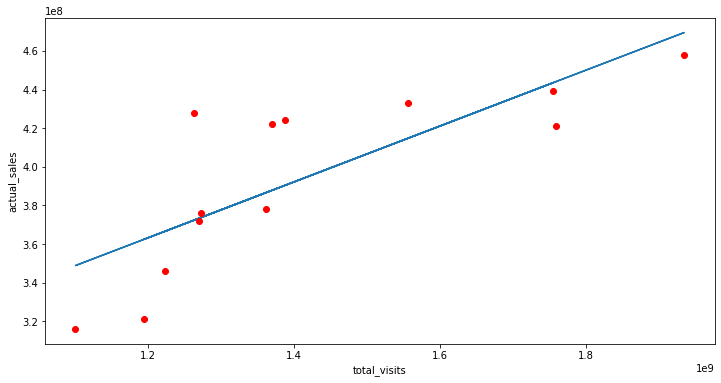

In [219]:
from matplotlib import pyplot as plt
df = data
plt.figure(figsize=(12, 6))
plt.plot(data.total_visits, predicted)
plt.plot(data.total_visits, data.actual_sales, 'ro')
plt.xlabel('total_visits')
plt.ylabel('actual_sales')
plt.show()

In [220]:
#lin_all

In [221]:
data

,ticker,grp,actual_sales,estimation,total_visits
0,TRIP US,16q3,421000000.0,436560000.0,1.757910e+09
1,TRIP US,16q4,316000000.0,327000000.0,1.100433e+09
2,TRIP US,17q1,372000000.0,376217000.0,1.270161e+09
3,TRIP US,17q2,424000000.0,421000000.0,1.387965e+09
4,TRIP US,17q3,439000000.0,451696000.0,1.754454e+09
5,TRIP US,17q4,321000000.0,309739000.0,1.193995e+09
6,TRIP US,18q1,378000000.0,360783000.0,1.361003e+09
7,TRIP US,18q2,433000000.0,434958000.0,1.556437e+09
8,TRIP US,18q3,458000000.0,469417000.0,1.934005e+09
9,TRIP US,18q4,346000000.0,342833000.0,1.222449e+09


In [222]:
err = pandas.DataFrame(columns = ['grp','error'], index = data.index)
err['grp'] = data['grp']
err['error'] = (data.actual_sales-lin_all.predicted)/data.actual_sales
err

,grp,error
0,16q3,-0.054673
1,16q4,-0.103989
2,17q1,-0.003831
3,17q2,0.079068
4,17q3,-0.010289
5,17q4,-0.128977
6,18q1,-0.022679
7,18q2,0.041898
8,18q3,-0.025117
9,18q4,-0.059306


<Figure size 864x864 with 0 Axes>

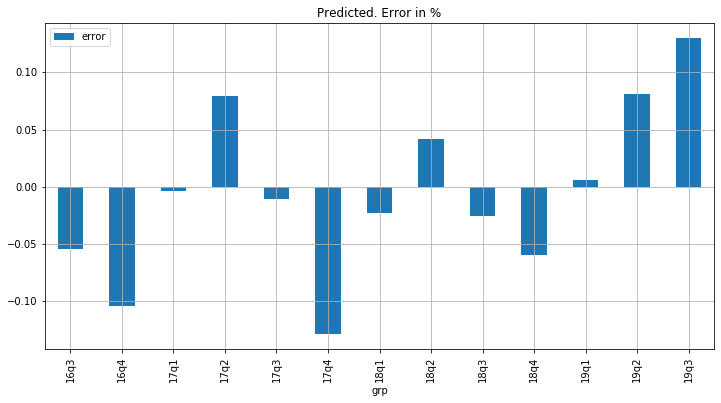

In [223]:
plt.figure(figsize=(12, 12))
err.plot(kind='bar', x='grp',y='error',figsize=(12, 6),title='Predicted. Error in %').grid()

# q3


In [224]:
q3 = err.loc[err['grp'].isin(['16q3','17q3','18q3'])]
q3

,grp,error
0,16q3,-0.054673
4,17q3,-0.010289
8,18q3,-0.025117


In [225]:
season3 = (q3.error).mean()
season3

-0.03002610656531575

In [226]:
#numpy.column_stack([q16.drop(['grp'],axis=1)])

# q4

In [227]:
q4 = err.loc[err['grp'].isin(['16q4','17q4','18q4'])]
q4

,grp,error
1,16q4,-0.103989
5,17q4,-0.128977
9,18q4,-0.059306


In [228]:
season4=(q4.error).mean()
season4

-0.09742375076902625

# q1

In [229]:
q1 = err.loc[err['grp'].isin(['16q1','17q1','18q1'])]
q1

,grp,error
2,17q1,-0.003831
6,18q1,-0.022679


In [230]:
season1=(q1.error).mean()
season1

-0.013255047943458375

# q2

In [231]:
q2 = err.loc[err['grp'].isin(['16q2','17q2','18q2'])]
q2

,grp,error
3,17q2,0.079068
7,18q2,0.041898


In [232]:
season2=(q2.error).mean()
season2

0.060483394669573864

In [233]:
season_coef = pandas.DataFrame( index = lin_all.index)
season_coef['grp'] = lin_all.grp
season_coef['season'] = [1+season3,1+season4,1+season1,1+season2,1+season3,1+season4,1+season1,1+season2,1+season3,1+season4,1+season1,1+season2,1+season3]
season_coef

,grp,season
0,16q3,0.969974
1,16q4,0.902576
2,17q1,0.986745
3,17q2,1.060483
4,17q3,0.969974
5,17q4,0.902576
6,18q1,0.986745
7,18q2,1.060483
8,18q3,0.969974
9,18q4,0.902576


In [234]:
lin_all['pred_season']=lin_all.predicted*season_coef.season
lin_all

,0,predicted,grp,pred_season
0,4.440171e+08,4.440171e+08,16q3,4.306850e+08
1,3.488604e+08,3.488604e+08,16q4,3.148731e+08
2,3.734251e+08,3.734251e+08,17q1,3.684754e+08
3,3.904750e+08,3.904750e+08,17q2,4.140922e+08
4,4.435169e+08,4.435169e+08,17q3,4.301999e+08
5,3.624016e+08,3.624016e+08,17q4,3.270951e+08
6,3.865727e+08,3.865727e+08,18q1,3.814486e+08
7,4.148580e+08,4.148580e+08,18q2,4.399500e+08
8,4.695034e+08,4.695034e+08,18q3,4.554060e+08
9,3.665198e+08,3.665198e+08,18q4,3.308121e+08


In [235]:
#lin_all.tail(6).reset_index()

delta(v(t)) = v(t) - v(t-1);
delta_seasonal(v(t))  = v(t) - v(t-4);
delta(Revenue(t+1)) = delta(revenue(t))*alpha + delta_seasonal(revenue(t))*beta + delta(total_visits)*gamma



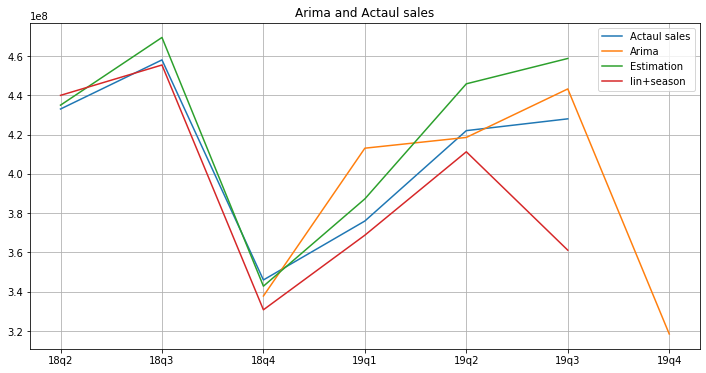

In [236]:
plt.figure(figsize=(12, 6))
plt.title('Arima and Actaul sales')
lin_all_pred=lin_all.tail(6).reset_index()
ar = arima_data.tail(7).reset_index()
ar = ar[0:6]
#predict_df = predict_df[0:3]
plt.plot(ar.group, ar.actual_sales,label = 'Actaul sales')
plt.plot(pred_and_actual_df.group, predict_df.predictions,label = 'Arima' )
plt.plot(ar.group, ar.estimation,label = 'Estimation')
plt.plot(ar.group, lin_all_pred.pred_season,label = 'lin+season')
plt.legend()
plt.grid()
plt.show()



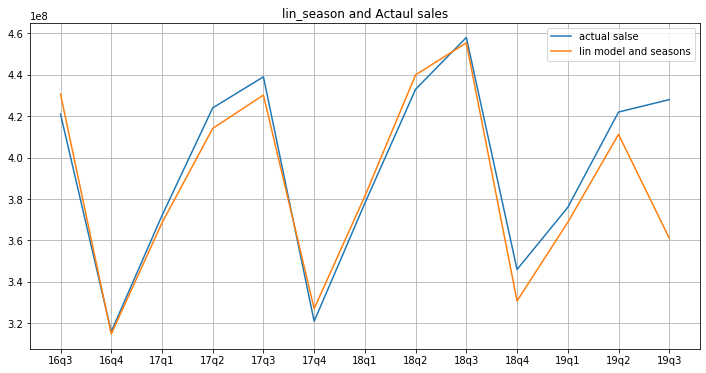

In [237]:
plt.figure(figsize=(12, 6))
plt.title('lin_season and Actaul sales')
#lin_all_pred=lin_all.tail(5).reset_index()
#ar = arima_data.tail(6).reset_index()
#ar = ar[0:5]
#predict_df = predict_df[0:3]
plt.plot(data.grp, data.actual_sales,label = 'actual salse')
#plt.plot(pred_and_actual_df.group, predict_df.predictions,label = 'Arima' )
#plt.plot(ar.group, ar.estimation,label = 'Estimation')
plt.plot(lin_all.grp, lin_all.pred_season,label = 'lin model and seasons')
plt.legend()
plt.grid()
plt.show()

In [238]:
err = pandas.DataFrame(columns = ['grp','error'], index = data.index)
err['grp'] = data['grp']
err['error'] = 100*(data.actual_sales-lin_all.pred_season)/data.actual_sales
err

,grp,error
0,16q3,-2.300483
1,16q4,0.356610
2,17q1,0.947479
3,17q2,2.336737
4,17q3,2.004588
5,17q4,-1.898774
6,18q1,-0.912340
7,18q2,-1.605088
8,18q3,0.566365
9,18q4,4.389579


<Figure size 864x864 with 0 Axes>

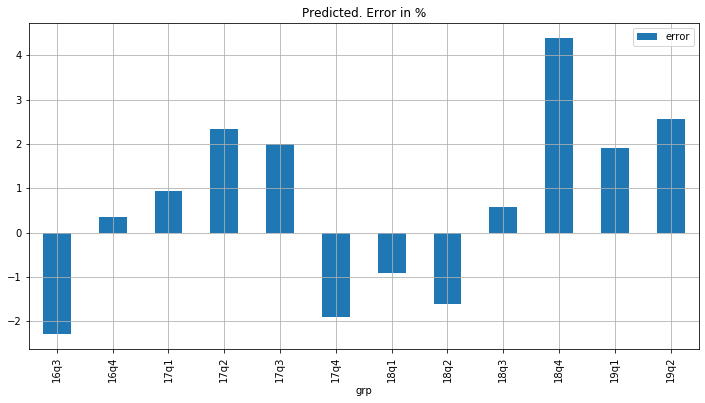

In [239]:
err = err.head(12)
plt.figure(figsize=(12, 12))
err.plot(kind='bar', x='grp',y='error',figsize=(12, 6),title='Predicted. Error in %').grid()

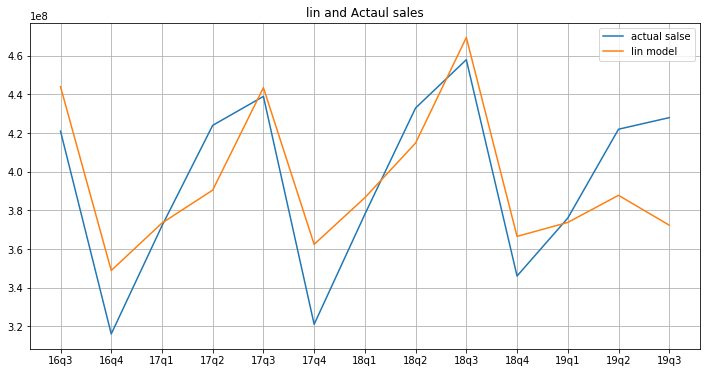

In [240]:
plt.figure(figsize=(12, 6))
plt.title('lin and Actaul sales')
#lin_all_pred=lin_all.tail(5).reset_index()
#ar = arima_data.tail(6).reset_index()
#ar = ar[0:5]
#predict_df = predict_df[0:3]
plt.plot(data.grp, data.actual_sales,label = 'actual salse')
#plt.plot(pred_and_actual_df.group, predict_df.predictions,label = 'Arima' )
#plt.plot(ar.group, ar.estimation,label = 'Estimation')
plt.plot(lin_all.grp, lin_all.predicted,label = 'lin model')
plt.legend()
plt.grid()
plt.show()

In [241]:
lin_all.pred_season

0     4.306850e+08
1     3.148731e+08
2     3.684754e+08
3     4.140922e+08
4     4.301999e+08
5     3.270951e+08
6     3.814486e+08
7     4.399500e+08
8     4.554060e+08
9     3.308121e+08
10    3.687890e+08
11    4.112343e+08
12    3.611473e+08
Name: pred_season, dtype: float64

y(x) = (a*x + b)*quarter_coef